In [2]:
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches


np.random.seed(42)
np.set_printoptions(precision=3)

## Urban dataset

In [2]:
mat = scipy.io.loadmat('../datasets/urban.mat')
X = mat['X']

# with open('../datasets/urban_full.npz', 'wb') as fout:
#     np.savez_compressed(fout, X=X)

In [3]:
m, n = X.shape # (162, 94249)
num_col = int(math.sqrt(n)) # 307

In [4]:
X3d = X.reshape(m, num_col, num_col, order='F') # order specified to match MATLAB

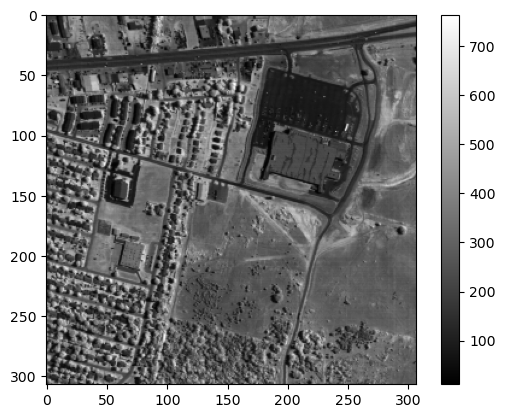

In [5]:
wavelength = 80
plt.imshow(X3d[wavelength, :, :], cmap='gray')
plt.colorbar()

#### Small dataset

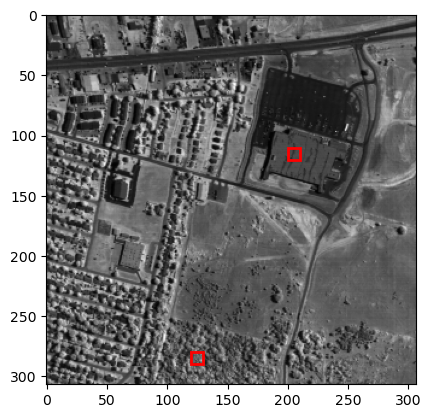

In [6]:
img = X3d[wavelength, :, :].copy()
# img[280: 290, 120: 130] = 1000 # trees
# img[110: 120, 200: 210] = 1000  # roof
# plt.imshow(img, cmap='gray')
# plt.colorbar()

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
rect_roof = patches.Rectangle((200, 110), 10, 10, linewidth=2, edgecolor='r', facecolor='none')
rect_tree = patches.Rectangle((120, 280), 10, 10, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect_roof)
ax.add_patch(rect_tree)
plt.savefig('foo.png')
plt.show()

In [7]:
trees3d = X3d[:, 280: 290, 120: 130] # (162, 10, 10)
roof3d = X3d[:, 110: 120, 200: 210] # (162, 10, 10)
smallX3d = np.hstack([trees3d, roof3d])  # (162, 20, 10)

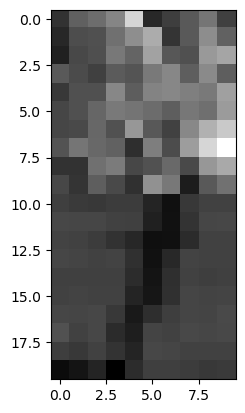

In [8]:
img = smallX3d[wavelength, :, :].copy()

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
plt.savefig('small_urban.png')
plt.show()

In [9]:
smallX = smallX3d.reshape(m, -1, order='F') # (162, 200)

In [11]:
# with open('../datasets/urban_small.npz', 'wb') as fout:
#     np.savez_compressed(fout, X=smallX)

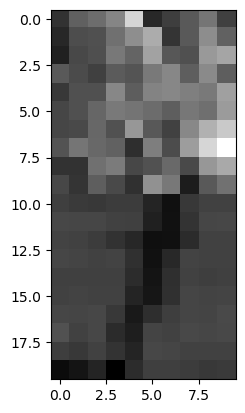

In [12]:
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
rect_roof = patches.Rectangle((200, 110), 10, 10, linewidth=2, edgecolor='r', facecolor='none')
rect_tree = patches.Rectangle((120, 280), 10, 10, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect_roof)
ax.add_patch(rect_tree)
plt.show()

## Jasper dataset

In [3]:
mat = scipy.io.loadmat('../datasets/jasper.mat')
X3d = mat['X'] # (100, 100, 198)

In [4]:
X = X3d.reshape(100 * 100, -1, order='F').T # (198, 10000)
X[X < 0] = 0

# with open('../datasets/jasper_full.npz', 'wb') as fout:
#     np.savez_compressed(fout, X=X)

In [5]:
X3d_new = X.reshape(-1, 100, 100, order='F') # (198, 100, 100)

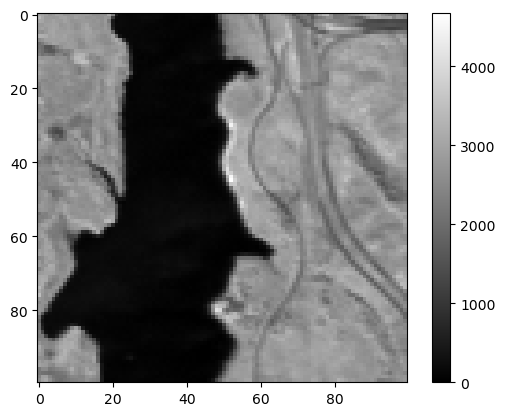

In [6]:
wavelength = 80
plt.imshow(X3d_new[wavelength, :, :], cmap='gray')
plt.colorbar()

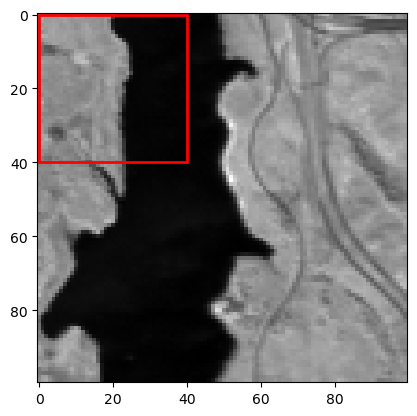

In [10]:
img = X3d_new[wavelength, :, :].copy()

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
rect_roof = patches.Rectangle((0, 0), 40, 40, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect_roof)
# ax.add_patch(rect_tree)
plt.savefig('../images_plots/small_jasper_outline.png')
plt.show()

In [15]:
smallX3d = X3d_new[:, :40, :40]
smallX = smallX3d.reshape(198, -1, order='F') # (198, 1600)
smallX.shape

(198, 1600)

In [16]:
with open('../datasets/jasper_small.npz', 'wb') as fout:
    np.savez_compressed(fout, X=smallX)